In [24]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

from mplsoccer import PyPizza, add_image, FontManager

In [25]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

In [26]:
URL = "https://www.pngarts.com/files/11/Martin-Odegaard-PNG-Picture.png?raw=true"
fdj_cropped = Image.open(urlopen(URL))

In [27]:
df = pd.read_csv('MartinOrdegard.csv')

In [28]:
df = df.dropna()

In [29]:
df = df[['Statistic','Percentile']]

In [30]:
df

,Statistic,Percentile
0,Non-Penalty Goals,15.0
1,npxG,9.0
2,Shots Total,19.0
3,Assists,21.0
4,xA,76.0
5,npxG+xA,33.0
6,Shot-Creating Actions,84.0
8,Passes Attempted,96.0
9,Pass Completion %,98.0
10,Progressive Passes,86.0


In [34]:
statistic = df['Statistic']

In [37]:
statistic

0          Non-Penalty Goals
1                       npxG
2                Shots Total
3                    Assists
4                         xA
5                    npxG+xA
6      Shot-Creating Actions
8           Passes Attempted
9          Pass Completion %
10        Progressive Passes
11       Progressive Carries
12        Dribbles Completed
13         Touches (Att Pen)
14    Progressive Passes Rec
16                 Pressures
17                   Tackles
18             Interceptions
19                    Blocks
20                Clearances
21               Aerials won
Name: Statistic, dtype: object

In [39]:
params = []
for i in range(len(statistic)):
    params.append(statistic.values[i])

In [40]:
params

['Non-Penalty Goals',
 'npxG',
 'Shots Total',
 'Assists',
 'xA',
 'npxG+xA',
 'Shot-Creating Actions',
 'Passes Attempted',
 'Pass Completion %',
 'Progressive Passes',
 'Progressive Carries',
 'Dribbles Completed',
 'Touches (Att Pen)',
 'Progressive Passes Rec',
 'Pressures',
 'Tackles',
 'Interceptions',
 'Blocks',
 'Clearances',
 'Aerials won']

In [41]:
percentile = df['Percentile']

In [42]:
percentile

0     15.0
1      9.0
2     19.0
3     21.0
4     76.0
5     33.0
6     84.0
8     96.0
9     98.0
10    86.0
11    91.0
12    24.0
13    28.0
14    21.0
16    56.0
17    13.0
18    25.0
19     1.0
20    41.0
21    28.0
Name: Percentile, dtype: float64

In [43]:
values = []
for i in range(len(percentile)):
    values.append(percentile.values[i])

In [44]:
values

[15.0,
 9.0,
 19.0,
 21.0,
 76.0,
 33.0,
 84.0,
 96.0,
 98.0,
 86.0,
 91.0,
 24.0,
 28.0,
 21.0,
 56.0,
 13.0,
 25.0,
 1.0,
 41.0,
 28.0]

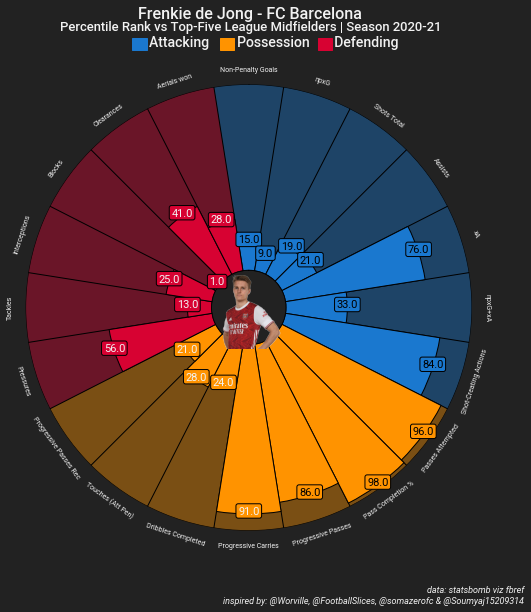

In [64]:
# color for the slices and text
slice_colors = ["#1A78CF"] * 7 + ["#FF9300"] * 7 + ["#D70232"] * 6
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 10

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=7,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.975, "Frenkie de Jong - FC Barcelona", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.955,
    "Percentile Rank vs Top-Five League Midfielders | Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#F2F2F2",
    ha="right"
)

# add text
fig.text(
    0.34, 0.93, "Attacking        Possession       Defending", size=14,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()

In [65]:
fig.savefig('martinordegard.png')